<a href="https://colab.research.google.com/github/ia4226/House-Price-Prediction-/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


**pandas**: This line imports the Pandas library and aliases it as pd. Pandas is a powerful data manipulation and analysis library for Python.

**numpy**: This line imports the NumPy library and aliases it as np. NumPy is a library for numerical operations in Python, and it is often used for handling arrays and matrices.

**matplotlib.pyplot**: This line imports the pyplot module from the Matplotlib library and aliases it as plt. Matplotlib is a popular plotting library for Python, and pyplot provides a MATLAB-like interface for creating static, animated, and interactive visualizations.

**seaborn**: This line imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

**sklearn.datasets**: Scikit-learn is a machine learning library for Python, and the datasets module contains various datasets that can be used for learning and practicing machine learning algorithms.

from sklearn.model_selection import **train_test_split**: This function is commonly used to split a dataset into training and testing sets for machine learning model training and evaluation.

from xgboost import **XGBRegressor**: XGBoost is an efficient and scalable implementation of gradient boosting, a popular machine learning algorithm.

**metrics**: Scikit-learn's metrics module provides various metrics and evaluation functions for assessing the performance of machine learning models.

Step 2: Import csv dataset

In [3]:
houseprice_dataset = sklearn.datasets.fetch_california_housing()

In [4]:
print(houseprice_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [6]:
# loading the dataset in pandas datafram to make it look structured
houseprice_dataframe = pd.DataFrame(houseprice_dataset.data, columns = houseprice_dataset.feature_names)


In [7]:
# Print the rows
houseprice_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
# add the target column to the dataframe
houseprice_dataframe['Price'] = houseprice_dataset.target

In [34]:
# remove the'Price'
houseprice_dataframe = houseprice_dataframe.drop(columns='Price')

In [35]:
houseprice_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
#number of rows and columns in the dataframe
houseprice_dataframe.shape

(20640, 9)

In [37]:
# check for missing values
houseprice_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [38]:
# statistical measures of the dataset
houseprice_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Step 3:  Understanding the correlation b/n features of the datasets
1. positive
2. negative

In [39]:
correlation = houseprice_dataframe.corr()

Step 4 : Constructing a heatmap to understand correlation

<Axes: >

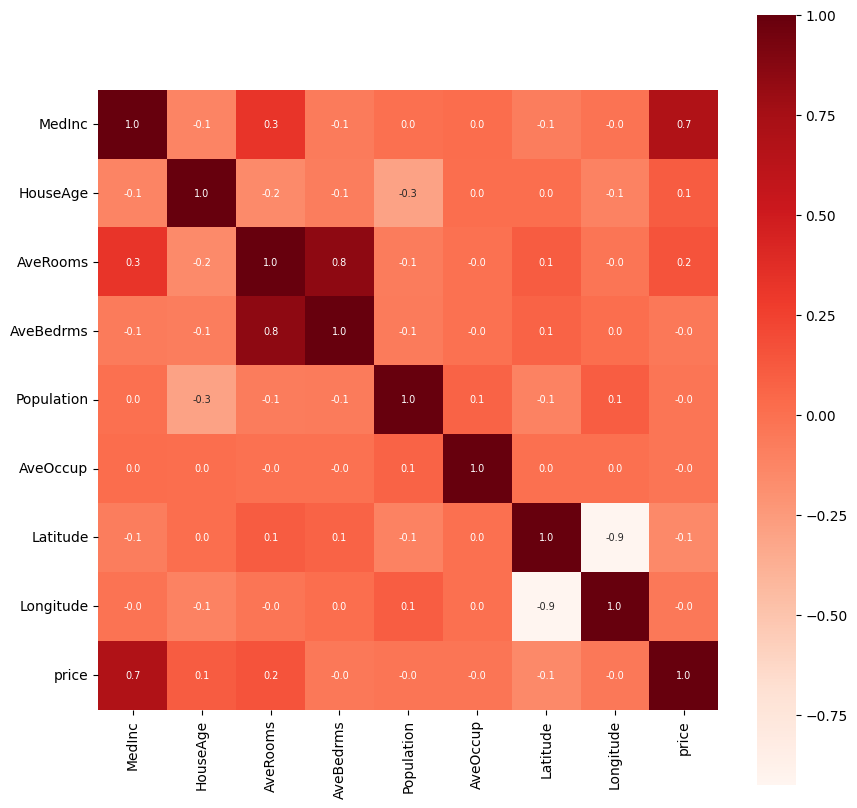

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':7}, cmap = 'Reds')


Step 5: Splitting the data and target

In [41]:
X = houseprice_dataframe.drop(['price'],axis = 1)
Y = houseprice_dataframe['price']

In [42]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

Step 6: Splitting the data into Test and Training

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Step 7: Model Training

In [46]:
# XGBooster
model = XGBRegressor()

In [47]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Step 8: Evaluation

In [48]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [49]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [52]:
# R squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# print these values

print("R Squared Value : ",score_1)
print("Mean Absolute Error : ",score_2)

R Squared Value :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


Value closer to 0 indicates that the model is working perfectly fine!

Visualizing Actual vs Predicted prices

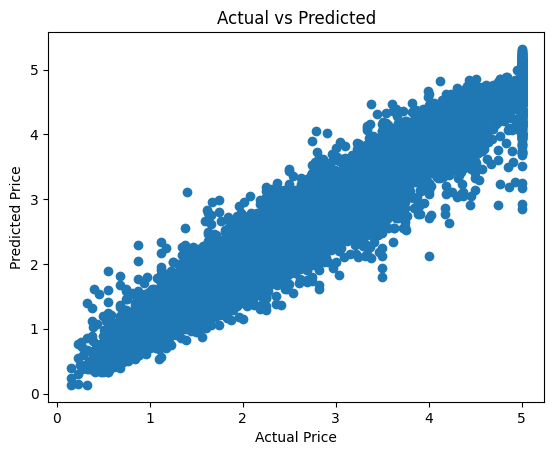

In [55]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

lots of data point

Step 9 : Predicting the Test Data

In [53]:
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [54]:
# R squared Error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# print these values

print("R Squared Value : ",score_3)
print("Mean Absolute Error : ",score_4)

R Squared Value :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


Extremely small values indiacte smoooooth operationnn